<a href="https://colab.research.google.com/github/raginipanwar/image-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("ice cream cone",limit=30,output_dir='images' , adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://cdn001.cakecentral.com/gallery/2017/07/900_melting-ice-cream-cone-997041mFIfl.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.vox-cdn.com/thumbor/3vRom6EXdhF-T7vUs45WaIoqG-I=/0x211:960x751/1600x900/cdn.vox-cdn.com/uploads/chorus_image/image/55156569/IC_Monster_2.0.0.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://bestanimations.com/Food/ice-pop-animated-gif.gif
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bing.com/th/id/OGC.73a5f1d5300bf4d6af5f7b3c2218dddc?pid=1.7&amp;rurl=http%3a%2f%2fbestanimations.com%2fFood%2fice-pop-animated-gif.gif&amp;ehk=2%2fDqe65TV5uyW8cpgPEtqq2hVzMxym8Y5iegGSRgfPA%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.73a5f1d5300bf4d6af5f7b3c2218dddc?pid=1.7&amp;rurl=http%3a%2f%2fbestanimations.com%2fFood%2fice-pop-animated-gif.gif&amp;ehk=2%2fDqe65TV5uyW8cpgPEtqq2hVzMxym8Y5iegGSRgfPA%3d
[!] Error:: HTTP Error

In [ ]:
from bing_image_downloader import downloader
downloader.download("hockey stick",limit=30,output_dir='images' , adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://hockeygods.com/system/gallery_images/10355/original.jpg?1367472019
[%] File Downloaded !

[%] Downloading Image #2 from https://staticg.sportskeeda.com/wp-content/uploads/2012/07/vasudevan-504135.jpg
[Error]Invalid image, not saving https://staticg.sportskeeda.com/wp-content/uploads/2012/07/vasudevan-504135.jpg

[!] Issue getting: https://staticg.sportskeeda.com/wp-content/uploads/2012/07/vasudevan-504135.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://www.gamewornauctions.net/images/products/secondary/32785.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/_1RXQ_nrK80/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://hockeygods.com/system/gallery_images/9235/original.jpeg?1351277846
[%] File Downloaded !

[%] Downloading Image #5 from http://www.gamewornauctions.net/images/products/secondary/33760

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['hockey stick', 'ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    #plt.imshow(img_array)
    img_resized = resize(img_array, (150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images) 

    



In [ ]:
flat_data[0] 

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])

In [ ]:
150*150*3

67500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

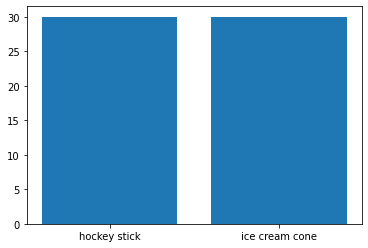

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count) 


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109) 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb')) 

In [ ]:
model = pickle.load(open('img_model.p','rb'))

enter your URLhttps://www.alfahockey.in/wp-content/uploads/2019/12/front-3.jpg
(1200, 1200, 3)
 PREDICTED OUTPUT: hockey stick


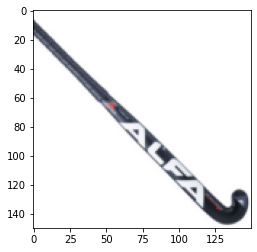

In [ ]:
flat_data =[]
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok


In [53]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize 
import pickle
from PIL import Image
st.title('Image Classifier using machine learning ')
st.text('upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['hockey stick', 'ice cream cone']
    st.write('result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    plt.imshow(img_resized)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')


Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url